In [1]:
import os
import torch
import copy
import torch.nn as nn
import torch.nn.functional as F
import imageio
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
import numpy as np
import seaborn as sns
import pandas as pd
from siren_pytorch import SirenNet



seed = 0
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [23]:
import numpy as np

# Define parameters for the mixture of Gaussians
num_samples = 200  # Total number of data points
num_dimensions = 20  # Number of dimensions
num_components = 5  # Number of Gaussian components

# Define parameters for each Gaussian component
means = [np.random.randn(num_dimensions) * 5 for _ in range(num_components)]  # Random means
covariance_matrices = [np.diag(np.random.rand(num_dimensions) + 1.0) for _ in range(num_components)]  # Random covariance matrices
weights = np.random.rand(num_components)  # Random weights for components

# Normalize the weights to sum to 1
weights /= np.sum(weights)

# Generate data points
data = np.zeros((num_samples, num_dimensions))
for i in range(num_samples):
    # Choose a component based on weights
    component = np.random.choice(num_components, p=weights)
    
    # Sample from the chosen Gaussian component
    sample = np.random.multivariate_normal(means[component], covariance_matrices[component])
    
    data[i] = sample

# 'data' now contains the mixture of Gaussian data in high dimensions
data_points = torch.from_numpy(data)
torch.save(data_points,"mog.pt")

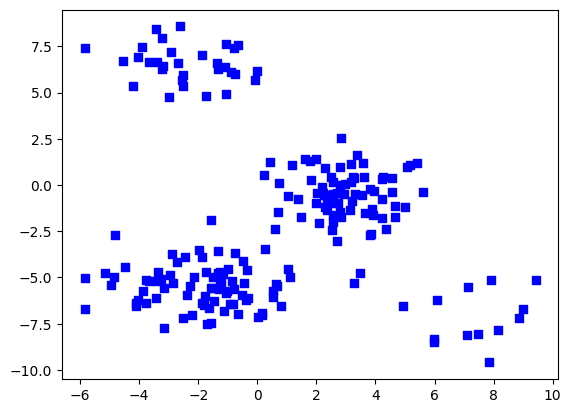

In [26]:
plt.scatter(data_points[:, 1], data_points[:, 2], label="Real data points", color="blue", marker="s")


In [2]:
num_real_samples = 150
feature_dim = 20

real_features = np.random.normal(loc=0.0, scale=1.0,
                                 size=[num_real_samples, feature_dim])
data_points = torch.from_numpy(real_features)
torch.save(data_points,"random.pt")

In [4]:
data_points = torch.tensor([
    [20.3, 17.2],
    [16.4, 14.25],
    [15.15, 9.65],
    [17.85, 5.25],
    [22.2, 2.6],
    [27.45, 3.35],
    [30.45, 7],
    [31.1, 12.6],
    [26.95, 14.95],
    [22.7, 13.3],
    [21.3, 10.4],
    [22, 8.2],
    [23.8, 7.2],
    [25.95, 7.25],
    [27.05, 8.95],
    [26.9, 10.35],
    [15.5, 12.2],
    [18.25, 15.85],
    [16.3, 7.75],
    [19.6, 3.45],
    [24.5, 2.75],
    [28.8, 5.05],
    [30.85, 9.85],
    [29.55, 13.95],
    [24.8, 14.5],
    [22, 12.45],
    [21.55, 9.4],
    [22.7, 7.65],
    [24.7, 7],
    [26.55, 8],
    [26.9, 9.6],
    [15.2, 11.15],
    [15.8, 13.35],
    [16.95, 14.95],
    [17.9, 15.85],
    [17.9, 15.85],
    [19.2, 16.65],
    [20.2, 17.05],
    [15.8, 8.4],
    [17, 6.2],
    [18.4, 4.3],
    [20.1, 3.45],
    [21.1, 2.9],
    [23.3, 2.9],
    [25.7, 2.9],
    [27.9, 4.15],
    [26.45, 2.95],
    [29.15, 5.75],
    [30.15, 6.35],
    [30.8, 8.2],
    [31.1, 10],
    [30.9, 9.1],
    [31.2, 11.2],
    [30.85, 12.6],
    [30.2, 13],
    [29.05, 13.95],
    [27.9, 14.8],
    [25.95, 14.8],
    [24.25, 14.3],
    [23.6, 14.05],
    [22.85, 13.25],
    [22.1, 12.55],
    [21.75, 11.6],
    [21.45, 10.8],
    [21.35, 9.6],
    [21.75, 9],
    [21.95, 8.45],
    [22.55, 7.85],
    [23.45, 7.45],
    [24.3, 7.45],
    [25.15, 7.25],
    [26.1, 7.5],
    [26.7, 8.45],
    [27.05, 9.65],
    [26.9, 10.35],
    [26.1, 10.75],
    [25.75, 10.75],
    [25.2, 10.7],
    [26.55, 10.85],
    [15.15, 10.75],
    [15.15, 10.3],
    [15.25, 11.8],
    [15.55, 13.3],
    [15.6, 12.85],
    [15.9, 13.8],
    [16.7, 14.6],
    [17.45, 15.6],
    [18.4, 16.25],
    [18.85, 16.5],
    [15.25, 9.15],
    [15.4, 8.9],
    [16.4, 7.15],
    [16.65, 6.65],
    [16.75, 6.25],
    [17.1, 5.8],
    [17.4, 5.5],
    [18, 4.9],
    [18.9, 3.9],
    [19.45, 3.75],
    [20.55, 3.05],
    [21.4, 2.85],
    [22.55, 2.65],
    [22.9, 2.65],
    [23.85, 2.85],
    [24.65, 2.7],
    [25.05, 2.75],
    [26.85, 3.2],
    [27.65, 4],
    [28.2, 4.5],
    [29, 5.2],
    [29.45, 5.75],
    [29.7, 6.1],
    [30.6, 7.35],
    [30.7, 7.9],
    [30.9, 8.55],
    [31.05, 10.4],
    [31.05, 11.6],
    [29.65, 13.55],
    [28.4, 14.35],
    [26.4, 15.05],
    [27.25, 14.95],
    [25.25, 14.7],
    [23.45, 13.95],
    [23.2, 13.6],
    [22.55, 12.9],
    [22, 12],
    [21.55, 11.25],
    [21.4, 10.1],
    [22.35, 8.1],
    [23.15, 7.7],
    [24.2, 7.3],
    [25.35, 7.3],
    [25.8, 7.5],
    [26.5, 8.05],
    [26.9, 9.1],
    [26.95, 10],
    [26.2, 10.6],
    [25.4, 10.7],
    [25.1, 10.45],
    [24.95, 10.15],
    [24.95, 9.9],
    [15.95, 8.2],
    [15.95, 8.2],
    [15.95, 8.2],
    [19.7, 16.85],
    [20.6, 17.2],
    [21.4, 17.25],
    [22.25, 17.3],
    [22.9, 17.35],
    [23.75, 17.35],
    [21.4, 17.35],
    [20.9, 17.3],
    [22.5, 17.4],
    [23.4, 17.35],
    [23.4, 17.35],
    [23.4, 17.35]
])

torch.save(data_points,"spiral.pt")

In [2]:
circle = torch.tensor([
[20.4, 17.6],
[21.1, 1.7],
[10.35, 9.85],
[32.5, 10.25],
[15.55, 2.5],
[11.6, 5.4],
[27.3, 3.3],
[30.9, 6.25],
[31.2, 14.45],
[27.3, 17.1],
[15.45, 16.6],
[11.75, 14.3],
[10.55, 10.3],
[10.15, 10.15],
[10, 9.75],
[10.3, 9.5],
[10.7, 9.55],
[10.7, 9.75],
[11.4, 5.9],
[11.75, 5.75],
[11.9, 5.35],
[11.7, 4.95],
[11.2, 4.95],
[11.2, 5.6],
[20.85, 1.4],
[21.05, 1.15],
[21.25, 1.3],
[21.45, 1.5],
[20.7, 1.7],
[21.05, 1.8],
[21.35, 1.95],
[27.4, 3.2],
[27.25, 2.85],
[27.2, 2.85],
[26.8, 2.95],
[26.7, 3.55],
[27.2, 3.45],
[26.5, 3.25],
[27, 3.1],
[20.6, 17.85],
[19.65, 18.05],
[20, 18.1],
[20, 17.75],
[20.55, 17.85],
[20.55, 18.05],
[20.55, 18.05],
[20.2, 18.25],
[15.3, 17.15],
[15.7, 16.95],
[16, 16.55],
[15.75, 16.45],
[15.3, 16.25],
[14.95, 16.7],
[15.1, 16.75],
[11.65, 14.35],
[11.45, 14.35],
[11.4, 14.4],
[11.4, 14.4],
[11.4, 14.4],
[11.85, 14.8],
[11.5, 14.8],
[11.35, 14.35],
[11.4, 14.2],
[12.15, 13.9],
[11.95, 13.85],
[11.6, 13.85],
[12.35, 14.35],
[11.95, 14.2],
[12.15, 14.65],
[15.6, 2.7],
[15.3, 2.75],
[15.25, 2.05],
[15.85, 2.15],
[15.1, 2.4],
[15.55, 2.05],
[15.95, 2.5],
[30.75, 6.1],
[30.4, 5.85],
[30.35, 6.25],
[30.5, 6.45],
[30.95, 6.45],
[31, 5.75],
[30.7, 5.75],
[31.2, 6],
[32.6, 10.1],
[32.4, 9.95],
[32.25, 10.25],
[32.7, 10.6],
[33.15, 10.35],
[33.1, 10],
[32.95, 9.65],
[32.7, 9.8],
[31.6, 14.4],
[31.4, 14.05],
[30.85, 14.15],
[30.85, 14.7],
[31.4, 14.75],
[30.95, 15.05],
[30.75, 14.45],
[26.9, 17.3],
[26.7, 17.2],
[26.75, 16.8],
[27.25, 16.8],
[26.75, 17.65],
[26.2, 17.4],
[26.25, 17.15],
[27, 17.75],
[27, 17.65],
[26.4, 17.8],
[25.8, 17.55],
[26, 17.15],
[26.05, 16.8],
[26.45, 16.8],
[22.05, 1.95],
[21.7, 1.9],
[21.75, 1.55],
[21.7, 1.15],
[21.15, 1.15],
[10.8, 10.25],
[11.4, 5.2],
[11.2, 5.2],
[10.9, 5.2],
[26.65, 3.15],
[26.65, 2.9],
[27.05, 2.55],
[27.45, 2.7],
[27.65, 3],
[32.7, 10.25],
[30.4, 6.85],
[30.8, 6.85],
[31.1, 6.7],
[20.8, 17.5],
[20.15, 17.25],
[21.05, 17.8],
[20.9, 18.3],
[15.65, 16.95]
])

torch.save(circle,"circle.pt")

In [3]:
circle_2 = torch.tensor([
[20.4, 17.6],
[21.1, 1.7],
[10.35, 9.85],
[32.5, 10.25],
[15.55, 2.5],
[11.6, 5.4],
[27.3, 3.3],
[30.9, 6.25],
[31.2, 14.45],
[27.3, 17.1],
[15.45, 16.6],
[11.75, 14.3],
[10.55, 10.3],
[10.15, 10.15],
[10, 9.75],
[10.3, 9.5],
[10.7, 9.55],
[10.7, 9.75],
[11.4, 5.9],
[11.75, 5.75],
[11.9, 5.35],
[11.7, 4.95],
[11.2, 4.95],
[11.2, 5.6],
[20.85, 1.4],
[21.05, 1.15],
[21.25, 1.3],
[21.45, 1.5],
[20.7, 1.7],
[21.05, 1.8],
[21.35, 1.95],
[27.4, 3.2],
[27.25, 2.85],
[27.2, 2.85],
[26.8, 2.95],
[26.7, 3.55],
[27.2, 3.45],
[26.5, 3.25],
[27, 3.1],
[20.6, 17.85],
[19.65, 18.05],
[20, 18.1],
[20, 17.75],
[20.55, 17.85],
[20.55, 18.05],
[20.55, 18.05],
[20.2, 18.25],
[15.3, 17.15],
[15.7, 16.95],
[16, 16.55],
[15.75, 16.45],
[15.3, 16.25],
[14.95, 16.7],
[15.1, 16.75],
[11.65, 14.35],
[11.45, 14.35],
[11.4, 14.4],
[11.4, 14.4],
[11.4, 14.4],
[11.85, 14.8],
[11.5, 14.8],
[11.35, 14.35],
[11.4, 14.2],
[12.15, 13.9],
[11.95, 13.85],
[11.6, 13.85],
[12.35, 14.35],
[11.95, 14.2],
[12.15, 14.65],
[15.6, 2.7],
[15.3, 2.75],
[15.25, 2.05],
[15.85, 2.15],
[15.1, 2.4],
[15.55, 2.05],
[15.95, 2.5],
[30.75, 6.1],
[30.4, 5.85],
[30.35, 6.25],
[30.5, 6.45],
[30.95, 6.45],
[31, 5.75],
[30.7, 5.75],
[31.2, 6],
[32.6, 10.1],
[32.4, 9.95],
[32.25, 10.25],
[32.7, 10.6],
[33.15, 10.35],
[33.1, 10],
[32.95, 9.65],
[32.7, 9.8],
[31.6, 14.4],
[31.4, 14.05],
[30.85, 14.15],
[30.85, 14.7],
[31.4, 14.75],
[30.95, 15.05],
[30.75, 14.45],
[26.9, 17.3],
[26.7, 17.2],
[26.75, 16.8],
[27.25, 16.8],
[26.75, 17.65],
[26.2, 17.4],
[26.25, 17.15],
[27, 17.75],
[27, 17.65],
[26.4, 17.8],
[25.8, 17.55],
[26, 17.15],
[26.05, 16.8],
[26.45, 16.8],
[22.05, 1.95],
[21.7, 1.9],
[21.75, 1.55],
[21.7, 1.15],
[21.15, 1.15],
[10.8, 10.25],
[11.4, 5.2],
[11.2, 5.2],
[10.9, 5.2],
[26.65, 3.15],
[26.65, 2.9],
[27.05, 2.55],
[27.45, 2.7],
[27.65, 3],
[32.7, 10.25],
[30.4, 6.85],
[30.8, 6.85],
[31.1, 6.7],
[20.8, 17.5],
[20.15, 17.25],
[21.05, 17.8],
[20.9, 18.3],
[15.65, 16.95],
[1.8, 18.1],
[2.1, 17.9],
[1.95, 17.75],
[1.35, 17.8],
[1.75, 17.6],
[1.5, 17.4],
[1.95, 17.1],
[2, 17.2],
[2.35, 17.5],
[1.6, 17.25],
[2, 17.05],
[2.65, 17.25],
[2.3, 16.95],
[2.65, 18],
[20.5, 9.95],
[21, 9.6],
[20.5, 9.5],
[20.05, 9.75],
[20.05, 9.2],
[20.5, 9.2],
[21, 9.2],
[20.95, 9.95],
[21.25, 9.65],
[20.95, 9.05]
])

torch.save(circle_2,"circle2.pt")

In [3]:
soviet = torch.tensor([
    [7.9, 2.1],
    [8.85, 2.95],
    [9.9, 4.05],
    [11.05, 4.95],
    [12, 5.9],
    [13, 5.2],
    [14.2, 4.45],
    [15.35, 4],
    [16.35, 3.75],
    [17.45, 3.65],
    [18.85, 3.75],
    [20.25, 4.05],
    [21.35, 4.3],
    [22.5, 4.9],
    [23.7, 5.6],
    [24.5, 6.45],
    [25.2, 7.15],
    [25.8, 8.1],
    [26.05, 9.6],
    [26.15, 10.9],
    [26, 12.15],
    [25.65, 13.6],
    [25.2, 14.95],
    [24.7, 16.05],
    [24.2, 16.65],
    [23.3, 17.5],
    [22.35, 18.1],
    [29.5, 1.55],
    [28.7, 2.25],
    [27.75, 3.15],
    [27.1, 3.8],
    [26.15, 4.6],
    [25.05, 5.6],
    [23.65, 6.85],
    [22.55, 7.7],
    [21.55, 8.3],
    [20.8, 8.95],
    [19.85, 9.7],
    [19.1, 10.3],
    [18.05, 11.1],
    [17.35, 11.7],
    [16.4, 12.55],
    [15.6, 13.45],
    [14.8, 12.95],
    [14.3, 12.3],
    [13.6, 11.55],
    [12.9, 10.85],
    [12, 11.15],
    [11.3, 12],
    [10.2, 12.85],
    [9.75, 13.5],
    [10.2, 14.15],
    [10.9, 14.6],
    [11.4, 15.1],
    [12.25, 15.7],
    [13.1, 16.55],
    [13.95, 17.4],
    [14.8, 18.05],
    [15.45, 18.55],
    [16.1, 18.15],
    [16.7, 17.6],
    [17.55, 16.8],
    [18.1, 16.3],
    [16.35, 14.25],
    [17, 14.8],
    [17.45, 15.2]
])

torch.save(soviet,"soviet.pt")

In [4]:
smiley = torch.tensor([
[15, 13.4],
[24.7, 13.8],
[14.4, 6.75],
[14.5, 6.5],
[14.7, 6.2],
[14.9, 6],
[15.05, 5.75],
[15.05, 5.75],
[20.6, 3.55],
[24.45, 4.6],
[26.25, 6.55],
[27.1, 7.8],
[15.25, 5.65],
[15.5, 5.45],
[15.65, 5.45],
[15.7, 5.45],
[15.7, 5.45],
[15.7, 5.45],
[15.95, 5.1],
[16.25, 4.8],
[16.5, 4.65],
[16.95, 4.45],
[17.2, 4.3],
[17.55, 4.2],
[17.85, 4.05],
[18.4, 4],
[18.6, 3.85],
[19.1, 3.65],
[19.5, 3.55],
[19.95, 3.4],
[20.45, 3.4],
[20.75, 3.4],
[21.1, 3.4],
[21.55, 3.45],
[21.85, 3.6],
[22.4, 3.6],
[22, 3.45],
[22.55, 3.5],
[22.9, 3.55],
[23.1, 3.6],
[23.35, 3.75],
[23.55, 3.95],
[23.85, 4.2],
[24.1, 4.4],
[24.45, 4.85],
[24.75, 5.1],
[25.05, 5.35],
[25.25, 5.65],
[25.6, 5.95],
[25.75, 6.2],
[26.1, 6.6],
[25.9, 6.1],
[26.15, 6.35],
[26.4, 6.75],
[26.65, 6.9],
[26.75, 7.2],
[27, 7.55],
[15.1, 13.4],
[14.9, 13.55],
[15.15, 13.7],
[15.3, 13.6],
[15.3, 13.1],
[15, 13.1],
[14.9, 13.1],
[14.55, 13.2],
[14.65, 13.65],
[15.1, 13.9],
[15.45, 13.65],
[15.45, 13.3],
[15.3, 12.9],
[14.95, 12.8],
[24.7, 13.75],
[24.75, 13.35],
[24.55, 13.35],
[24.25, 13.4],
[24.25, 13.85],
[24.6, 14.1],
[25.1, 13.8],
[25.1, 13.4],
[24.8, 13.1],
[24.35, 13.1],
[24.1, 13.5],
[25.35, 13.2],
[25.1, 13],
[24.65, 12.95],
[25.6, 13.7],
[25.25, 13.4],
[25.25, 13.8],
[24.9, 13.95],
[25, 14],
[25.3, 14],
[14.65, 13.05],
[15.6, 12.8],
[15.75, 13.1],
[15.75, 13.45],
[20.35, 10.65],
[20.3, 10.2],
[20.3, 9.9],
[20.3, 9.55],
[20.3, 9],
[20.3, 9.45],
[20.3, 8.75],
[20.3, 8.35],
[20.3, 7.95],
[13.35, 6],
[13.6, 6.4],
[14, 6.75],
[14.45, 7],
[14.85, 7.15],
[15.2, 7.25],
[15.5, 7.25],
[13.9, 6.45],
[13.35, 5.8],
[26, 8],
[26.4, 8],
[26.55, 8],
[26.75, 8],
[27.15, 7.85],
[27.25, 7.5],
[27.35, 7.3],
[27.4, 7.1],
[27.45, 6.8],
[27.5, 6.55],
[27.6, 6.25],
[11.85, 14.95],
[12.3, 15.3],
[12.1, 15.15],
[12.75, 15.5],
[13, 15.6],
[13.35, 15.75],
[13.7, 15.75],
[14.3, 15.8],
[14.9, 15.75],
[15.35, 15.7],
[15.8, 15.65],
[16, 15.5],
[16.2, 15.5],
[16.35, 15.4],
[16.7, 15.2],
[22.3, 14.95],
[22.5, 15.1],
[22.55, 15.1],
[22.85, 15.3],
[23.15, 15.45],
[23.55, 15.5],
[23.85, 15.6],
[24.55, 15.6],
[24.15, 15.6],
[24.9, 15.65],
[25.55, 15.5],
[25.15, 15.6],
[25.95, 15.4],
[26.35, 15.2],
[26.7, 15.1],
[26.85, 15.1],
[26.95, 14.95],
[27.2, 14.8],
[13.95, 15.9],
[14.65, 15.9],
[16.9, 15.3],
[11.65, 14.9],
[11.55, 14.75]
])

torch.save(smiley,"smiley.pt")